In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt

#from sklearn.model_selection import train_test_split

#dataset_path = r"C:\Users\Dell\Documents\PhD\Semester 3\Pebelejaran Mesin Lanjut\Tugas\boston.csv"
#boston = pd.read_csv(dataset_path)

#boston.head()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

x_train_df = pd.DataFrame(x_train, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
x_test_df = pd.DataFrame(x_test, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
#y_train_df.head()
#y_train_df.shape

In [2]:
x_train_df['MEDV'] = y_train_df
x_test_df['MEDV'] = y_test_df
#x_train_df.shape

In [ ]:
x_train_df['MEDV'].describe()

In [3]:
#x = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
#y = boston['MEDV']

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(14,)))#,
                               #kernel_regularizer=tf.keras.regularizers.L2()))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(512, activation='tanh')),
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(512, activation='sigmoid')),
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 512)               33280     
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 512)               33280     
                                                                 
 dense_6 (Dense)             (None, 1)                 5

In [5]:
model.compile(loss='mean_squared_logarithmic_error',
             optimizer='Adam',
             metrics=['mean_squared_logarithmic_error'])

In [6]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train_df, y_train, epochs=200, batch_size=64, validation_split=0.2)
end_time = datetime.now()

history.history

Epoch 1/200
6/6 [==============================] - 2s 68ms/step - loss: 5.1707 - mean_squared_logarithmic_error: 5.1707 - val_loss: 2.5591 - val_mean_squared_logarithmic_error: 2.5591
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 1.6337 - mean_squared_logarithmic_error: 1.6337 - val_loss: 0.8514 - val_mean_squared_logarithmic_error: 0.8514
Epoch 3/200
6/6 [==============================] - 0s 18ms/step - loss: 0.5612 - mean_squared_logarithmic_error: 0.5612 - val_loss: 0.3636 - val_mean_squared_logarithmic_error: 0.3636
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 0.2666 - mean_squared_logarithmic_error: 0.2666 - val_loss: 0.2269 - val_mean_squared_logarithmic_error: 0.2269
Epoch 5/200
6/6 [==============================] - 0s 15ms/step - loss: 0.1937 - mean_squared_logarithmic_error: 0.1937 - val_loss: 0.1802 - val_mean_squared_logarithmic_error: 0.1802
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 0.1701 -

{'loss': [5.170691967010498,
  1.6337414979934692,
  0.5611922144889832,
  0.2666124701499939,
  0.1937342882156372,
  0.1700773686170578,
  0.16063979268074036,
  0.1566159874200821,
  0.15434785187244415,
  0.15309680998325348,
  0.15220937132835388,
  0.15151819586753845,
  0.15085969865322113,
  0.15031087398529053,
  0.15004657208919525,
  0.14984187483787537,
  0.1497219204902649,
  0.1495703160762787,
  0.14940379559993744,
  0.14930155873298645,
  0.14925512671470642,
  0.14918452501296997,
  0.14908260107040405,
  0.1490088850259781,
  0.1489708423614502,
  0.14892397820949554,
  0.14875462651252747,
  0.14863668382167816,
  0.1485803872346878,
  0.14845913648605347,
  0.1483146697282791,
  0.14830264449119568,
  0.14817875623703003,
  0.14804455637931824,
  0.147726908326149,
  0.14732442796230316,
  0.14698489010334015,
  0.1465870887041092,
  0.14621564745903015,
  0.14583231508731842,
  0.1452726274728775,
  0.14469003677368164,
  0.14402905106544495,
  0.14315804839134216

In [8]:
result = model.evaluate(x_test_df, y_test)
print('Loss, Accuracy: ', result)
print('Training Duration: {}'.format(end_time - start_time))

4/4 [==============================] - 0s 11ms/step - loss: 0.0248 - mean_squared_logarithmic_error: 0.0248
Loss, Accuracy:  [0.0248086117208004, 0.0248086117208004]
Training Duration: 0:00:23.468694


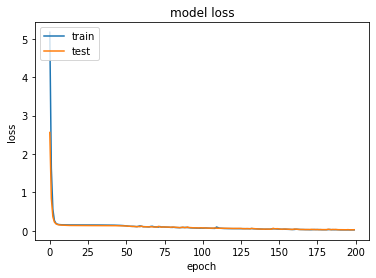

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()